# Phase 1 Code Challenge Review 

_November 4, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [93]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [94]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
# examine the dimensions of it
df.shape

(150, 5)

In [96]:
# check to see if you have missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [97]:
# introduce some missing values
df.iloc[2:10,1:3] = np.nan

In [98]:
df.isnull().sum()

sepal_length    0
sepal_width     8
petal_length    8
petal_width     0
species         0
dtype: int64

In [99]:
#if dropping by row axis = 0

In [100]:
# drop them by certain columns
df.dropna(subset = ['sepal_width'], axis = 0, inplace = True)

In [103]:
df.shape

(142, 5)

In [104]:
# convert and modify columns


# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length'] * 10

In [105]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0


In [106]:
# another way? lambda
df['sepal_length_10_lambda'] = df['sepal_length'].apply(lambda x:x * 10)

In [107]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0,48.0


#### 2. Data Visualization

In [109]:
# how many species are there, and how many flowers are in each species
df['species'].nunique()

3

In [110]:
df.groupby(['species']).count()
# or 
#df.groupby(['species']).size() gives the same result

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
species,,,,,,
setosa,42,42,42,42,42,42
versicolor,50,50,50,50,50,50
virginica,50,50,50,50,50,50


In [111]:
# let's plot the average pedal length for each species of iris 
df.groupby(['species'])['petal_length'].mean()

species
setosa        1.461905
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

In [112]:
petal_length_by_sp = df.groupby(['species'])['petal_length'].mean()

Text(0, 0.5, 'length in inches')

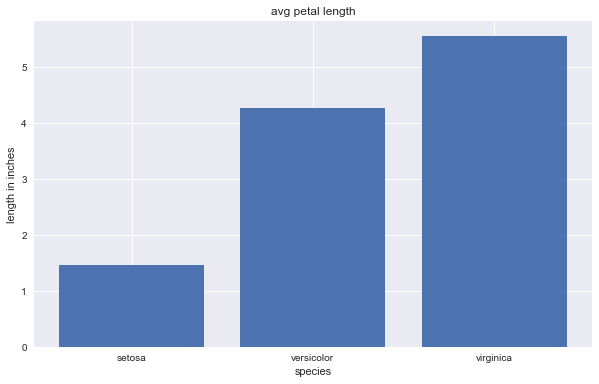

In [116]:
y = petal_length_by_sp
x = petal_length_by_sp.index
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('avg petal length')
ax.set_xlabel('species')
ax.set_ylabel ('length in inches')
# ax.set_xticks([1,2,3])
# ax.set_xticklabels(['flower1','flower2','flower3'])
#if you can't get it to work then set tickslabels

<BarContainer object of 4 artists>

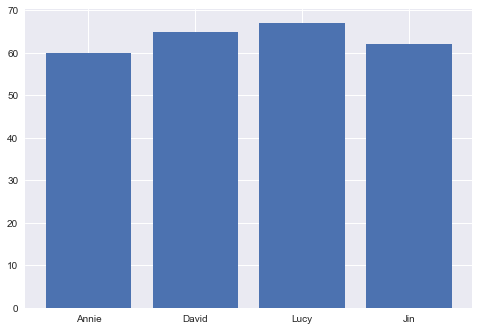

In [117]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)


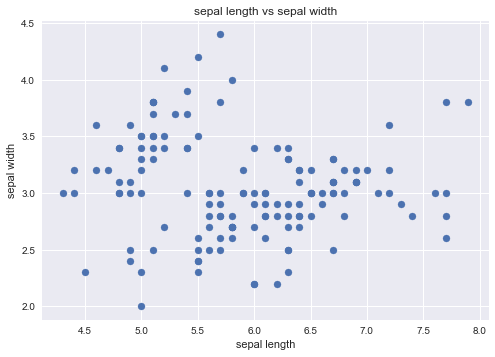

In [118]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [108]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
sepal_length,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000
sepal_width,-0.092449,1.000000,-0.414134,-0.349062,-0.092449,-0.092449
petal_length,0.861474,-0.414134,1.000000,0.959259,0.861474,0.861474
petal_width,0.802464,-0.349062,0.959259,1.000000,0.802464,0.802464
sepal_length_10,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000
sepal_length_10_lambda,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [36]:
# calculate the mean and median value for sepal length 
df.sepal_length.mean()
df.sepal_length.median()

5.8

In [37]:
#aggregate function
df.sepal_length.agg(['mean','median'])

mean      5.900704
median    5.800000
Name: sepal_length, dtype: float64

In [ ]:
# what can you say about the distribution of sepal length and sepal width based on this distribution? 

In [40]:
# which flower has the longest pedal? what is the species of that flower (what is the index and the species of that flower)
df.groupby(['species']).petal_length.max()

species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [44]:
df.sort_values(by = 'petal_length', ascending = False)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0
122,7.7,2.8,6.7,2.0,virginica,77.0,77.0
117,7.7,3.8,6.7,2.2,virginica,77.0,77.0
105,7.6,3.0,6.6,2.1,virginica,76.0,76.0
131,7.9,3.8,6.4,2.0,virginica,79.0,79.0
...,...,...,...,...,...,...,...
42,4.4,3.2,1.3,0.2,setosa,44.0,44.0
14,5.8,4.0,1.2,0.2,setosa,58.0,58.0
35,5.0,3.2,1.2,0.2,setosa,50.0,50.0
13,4.3,3.0,1.1,0.1,setosa,43.0,43.0


In [46]:
#use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [48]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [50]:
# get the money 
get_money['get'][0]['get'][0]['get']

'money'

In [52]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [65]:
# explore the structure of dictionary


In [69]:
# create a list of names containing all pets' names
names = list(groomer_info['pets'][0].keys())
print (names)
# >>>['Ginger','Chloe','Joe Rogan','Rick Astley']

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']


In [70]:
#  create a list that contain all pets' types
for name in names:
    print(groomer_info['pets'][0][name][0]['type'])
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']


Pitbull
Maine Coon Cat
Parrot
Labrador


In [ ]:
# create a list that contain all pets age 
age = list(groomer_info['pets'][])

In [ ]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(groomer_info, age):
    pass

In [ ]:
pets_older_than(groomer_info,4)
>>> ['Ginger','Joe Rogan']

syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]